In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
table = pd.read_csv("/Users/ilmasheriff/Downloads/combined_data_gather_twitter_Oct_30.csv",encoding= 'unicode_escape').head(100000)

In [3]:
table.shape

(100000, 4)

In [4]:
table.columns

Index(['Timestamp', 'Data', 'Polarity', 'Sentiment'], dtype='object')

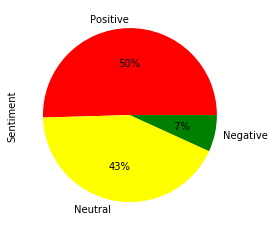

In [5]:
table.Sentiment.value_counts().plot(kind='pie', autopct='%2.0f%%', colors=["red", "yellow", "green"])

In [6]:
features = table.iloc[:, 1].values
labels = table.iloc[:, 3].values

In [7]:
features

array(['cnsnews benshapiro Can COVID19Vaccine end the pandemic',
       'IntrepidWarrior realDonaldTrump Can COVID19Vaccine end the pandemic',
       'edyong209 HelenBranswell Can COVID19Vaccine end the pandemic',
       ...,
       'As soon as COVID19vaccine will be available for production at a mass scale every person in Bihar will get free v',
       'COVID19 Vaccine Trials Cant Tell if the Shots Save Lives Says BMJ ExpertCOVID19Vaccine BMJ',
       'Volunteer in COVID19 Vaccine Trial Dies Health Officials via epochtimes COVID19'],
      dtype=object)

In [8]:
labels

array(['Neutral', 'Neutral', 'Neutral', ..., 'Positive', 'Neutral',
       'Neutral'], dtype=object)

In [9]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)


In [10]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [12]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [13]:
predictions = text_classifier.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 1364     2     0]
 [    0  8457     0]
 [    0     0 10177]]
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      1366
     Neutral       1.00      1.00      1.00      8457
    Positive       1.00      1.00      1.00     10177

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

0.9999
